## High resolution scVelo and CellRank analysis of WT cells

Author: Zhiyuan Hu \
Date: 25 oct 2023 \
Last modified: 25 oct 2023

In [1]:
# use the conda env cellrank_new
import scvelo as scv
import scanpy as sc
import numpy as np
import pandas as pd
# import seaborn as sns
import matplotlib as plt
import os
import loompy
import cellrank as cr
##!pip install tqdm

In [4]:
# !pip install fa2
#!conda install -c conda-forge leidenalg

In [5]:
scv.logging.print_version()

scv.settings.verbosity = 3  # show errors(0), warnings(1), info(2), hints(3)
scv.settings.presenter_view = True  # set max width size for presenter view
scv.set_figure_params('scvelo')  # for beautified visualization
cr.settings.verbosity = 2
import os
os.chdir("/home/huzhiy/projects_ox/smartseq3_nc/analysis/velocity")

Running scvelo 0.2.4 (python 3.8.13) on 2023-10-25 15:42.


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
ERROR: XMLRPC request failed [code: -32500]
RuntimeError: PyPI no longer supports 'pip search' (or XML-RPC search). Please use https://pypi.org/search (via a browser) instead. See https://warehouse.pypa.io/api-reference/xml-rpc.html#deprecated-methods for more information.


In [7]:
adata=scv.read("data/scvelo_output/nc01to08_ncwt_scVelo_out.h5ad")
adata

AnnData object with n_obs × n_vars = 697 × 3000
    obs: 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'ncount_rna', 'nfeature_rna', 'percent.mt', 'sample_id', 'sample', 'stage', 'genotype', 'doubletfinder', 'tssenrichment', 'readsintss', 'readsinpromoter', 'readsinblacklist', 'promoterratio', 'passqc', 'nucleosomeratio', 'nmultifrags', 'nmonofrags', 'nfrags', 'ndifrags', 'doubletscore', 'doubletenrichment', 'blacklistratio', 'demuxlet_singlet', 'rna_snn_res.0.6', 'seurat_clusters', 'major_clusters', 'ntornc', 'rna_snn_res.0.8', 'major_clusters_ntnnc', 'rna_snn_res.1', 'genotype_new', 's.score', 'g2m.score', 'phase', 'old.ident', 'cell_type', 'method', 'batch', 'sampleid', 'well', 'x96wplate', 'x384wplate', 'facsgate', 'note', 'conc', 'index1name', 'index1sequence', 'index2name', 'index2sequence', 'barcode', 'cell_name', 'citrine_counts', 'mcherry_counts', 'citrine_umis', 'mcherry_umis', 'foxd3_counts', 'foxd3_umis', 'umi_

In [8]:
# Reanalyze this subset of cells
# Make PCA
sc.tl.pca(adata)
# Make diffusion map
print('DiffMap')
sc.tl.diffmap(adata, random_state=5)
# Make graph
print('Graph')
sc.tl.draw_graph(adata)

DiffMap
Graph


In [12]:
sc.tl.umap(adata)

recovering dynamics (using 1/48 cores)


  0%|          | 0/1126 [00:00<?, ?gene/s]

/home/huzhiy/software/anaconda3/envs/cellrank_new/lib/python3.8/site-packages/scvelo/tools/dynamical_model.py:713: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array([dm.alpha, dm.beta, dm.gamma, dm.pars[:3]]) / dm.m[-1]
/home/huzhiy/software/anaconda3/envs/cellrank_new/lib/python3.8/site-packages/scvelo/tools/dynamical_model.py:716: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array([dm.t, dm.tau, dm.t_, dm.pars[4]]) * dm.m[-1]


    finished (0:02:27) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)
computing velocities
    finished (0:00:00) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 1/48 cores)


  0%|          | 0/697 [00:00<?, ?cells/s]

/home/huzhiy/software/anaconda3/envs/cellrank_new/lib/python3.8/site-packages/scvelo/core/_parallelize.py:138: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  res = np.array(res) if as_array else res


    finished (0:00:00) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_tsne', embedded velocity vectors (adata.obsm)


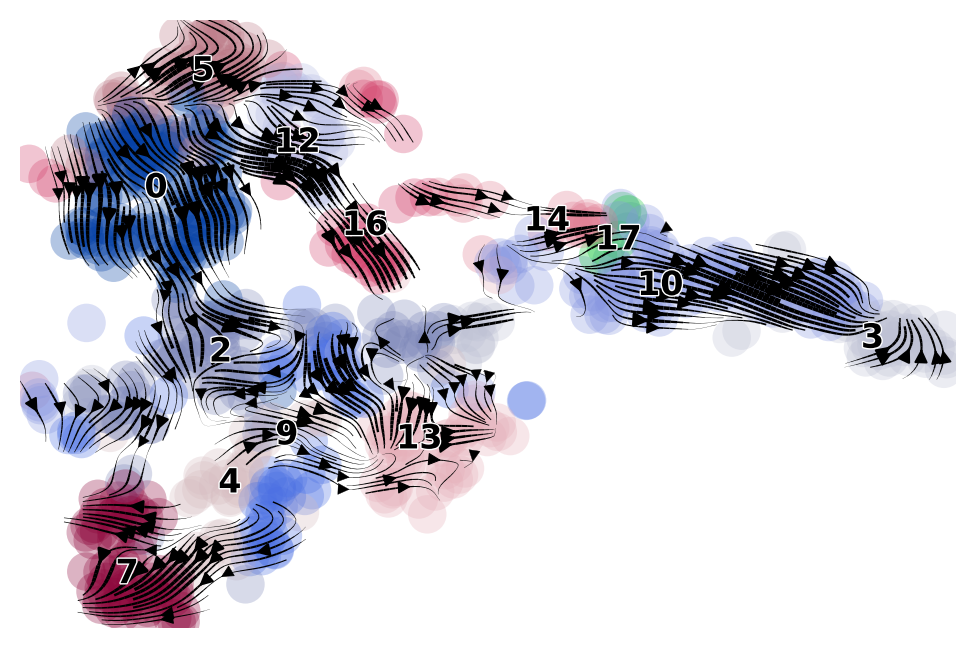

In [9]:
# Run dynamical model from scVelo 
scv.tl.recover_dynamics(adata)

scv.tl.velocity(adata)
scv.tl.velocity_graph(adata)
scv.pl.velocity_embedding_stream(adata, basis="tsne", legend_fontsize=12, color="seurat_clusters",
title="", density = 5, smooth=0.8, min_mass=4)


computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


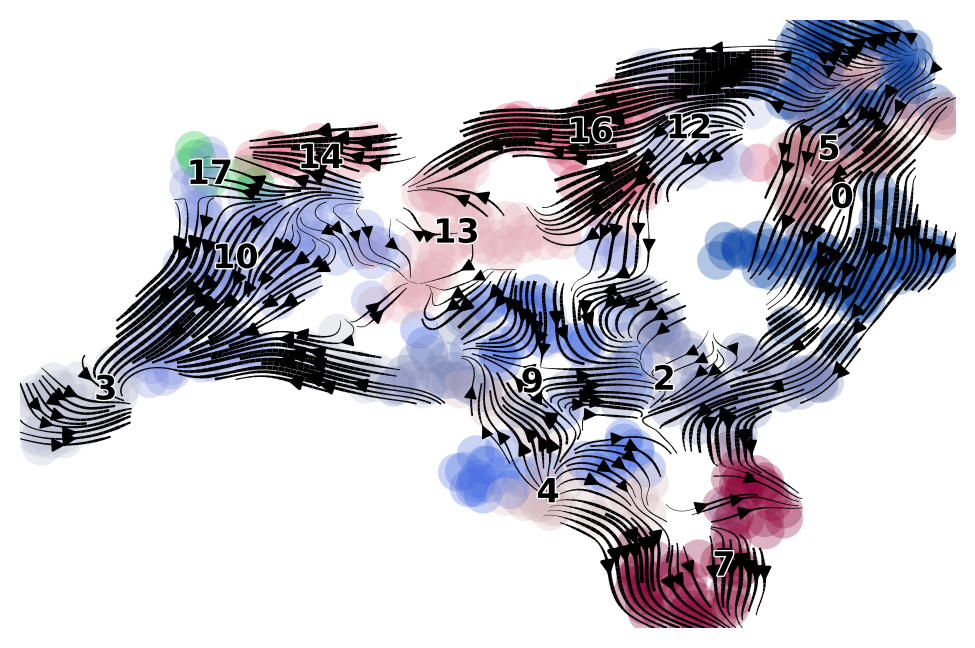

In [13]:
scv.pl.velocity_embedding_stream(adata, basis="umap", legend_fontsize=12, color="seurat_clusters",
title="", density = 5, smooth=0.8, min_mass=4)


computing velocity embedding
    finished (0:00:00) --> added
    'velocity_draw_graph_fa', embedded velocity vectors (adata.obsm)


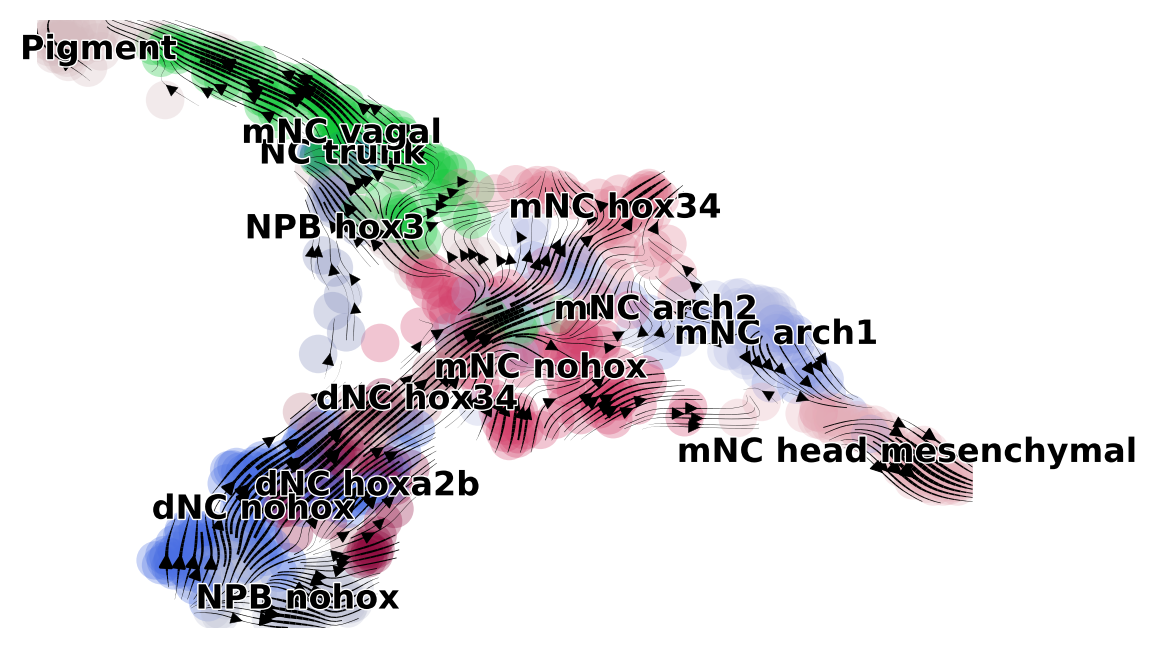

In [11]:
scv.pl.velocity_embedding_stream(adata, basis="draw_graph_fa", legend_fontsize=12, color="cell_type",
title="", density = 5, smooth=0.8, min_mass=4)

## Visualisation

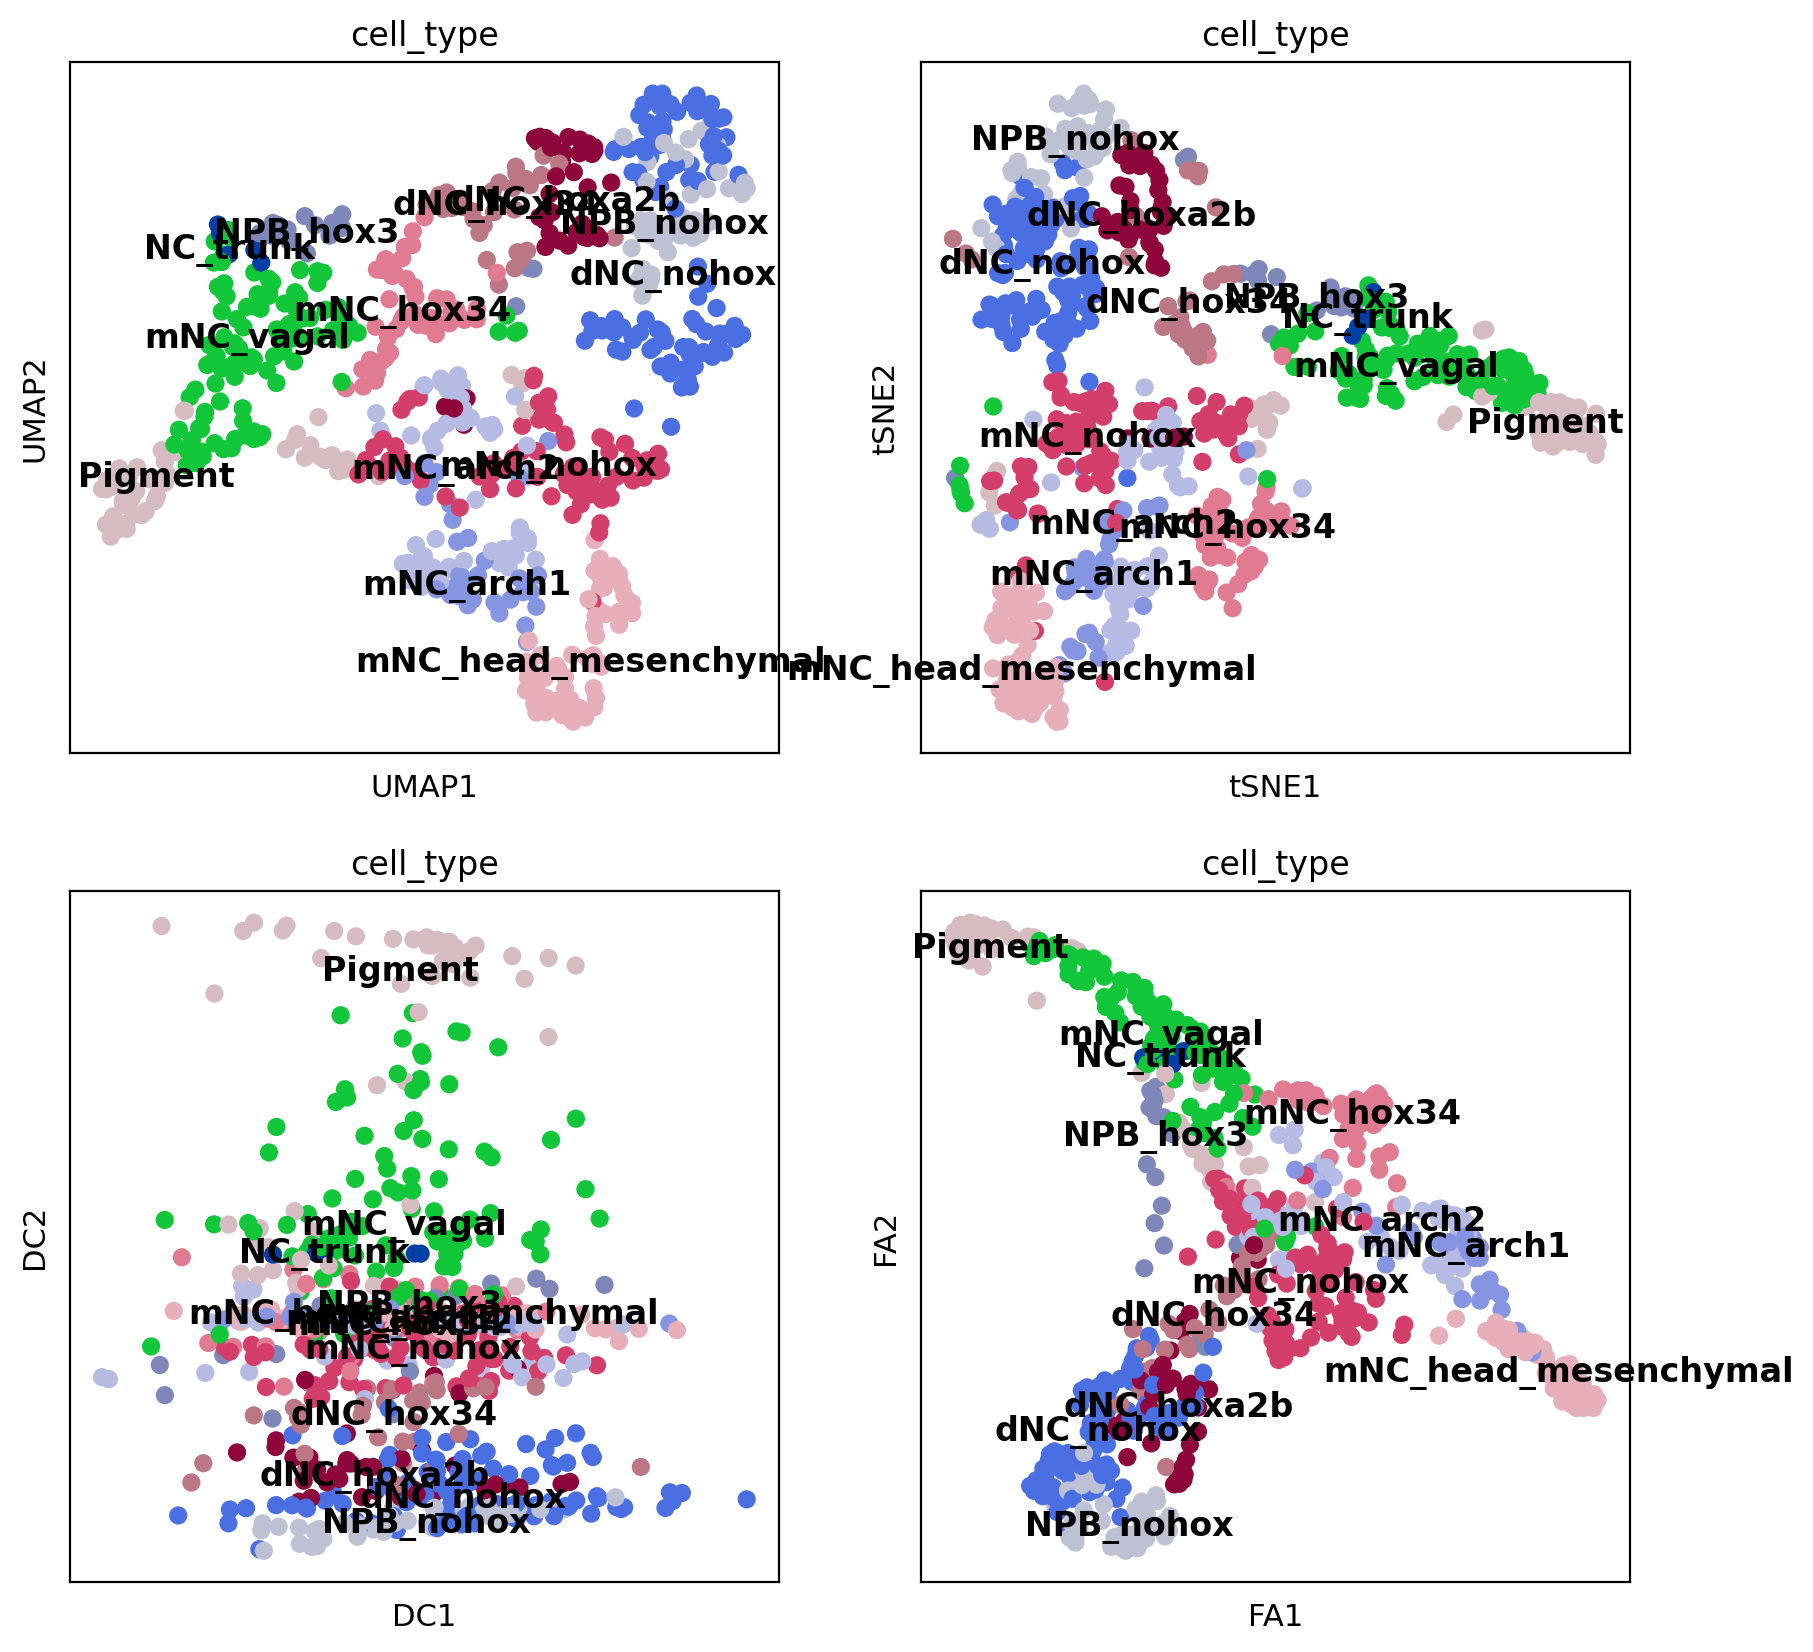

In [14]:
# Visualize
import matplotlib.pyplot as plt
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10,10))
ax1_dict = sc.pl.umap(adata, color='cell_type', legend_loc='on data', ax=ax1, show=False)
ax2_dict = sc.pl.tsne(adata, color='cell_type', legend_loc='on data', ax=ax2, show=False)
ax3_dict = sc.pl.diffmap(adata, color='cell_type', legend_loc='on data', ax=ax3, show=False)
ax4_dict = sc.pl.draw_graph(adata, color='cell_type', legend_loc='on data', ax=ax4, show=False)

In [15]:
adata

AnnData object with n_obs × n_vars = 697 × 3000
    obs: 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'ncount_rna', 'nfeature_rna', 'percent.mt', 'sample_id', 'sample', 'stage', 'genotype', 'doubletfinder', 'tssenrichment', 'readsintss', 'readsinpromoter', 'readsinblacklist', 'promoterratio', 'passqc', 'nucleosomeratio', 'nmultifrags', 'nmonofrags', 'nfrags', 'ndifrags', 'doubletscore', 'doubletenrichment', 'blacklistratio', 'demuxlet_singlet', 'rna_snn_res.0.6', 'seurat_clusters', 'major_clusters', 'ntornc', 'rna_snn_res.0.8', 'major_clusters_ntnnc', 'rna_snn_res.1', 'genotype_new', 's.score', 'g2m.score', 'phase', 'old.ident', 'cell_type', 'method', 'batch', 'sampleid', 'well', 'x96wplate', 'x384wplate', 'facsgate', 'note', 'conc', 'index1name', 'index1sequence', 'index2name', 'index2sequence', 'barcode', 'cell_name', 'citrine_counts', 'mcherry_counts', 'citrine_umis', 'mcherry_umis', 'foxd3_counts', 'foxd3_umis', 'umi_

running PAGA using priors: ['velocity_pseudotime']
    finished (0:00:00) --> added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns)
    'paga/transitions_confidence', velocity transitions (adata.uns)


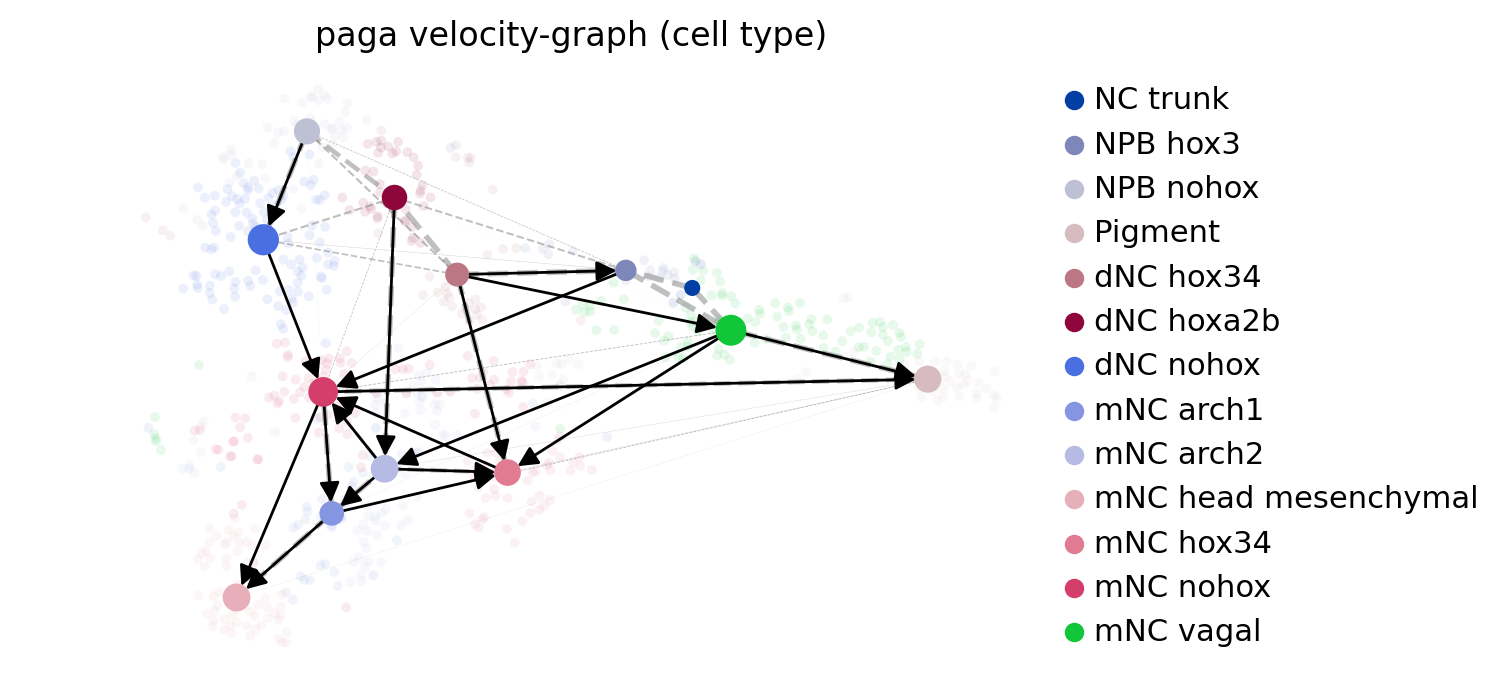

In [18]:
### PAGA velocity graph
adata.uns['neighbors']['distances'] = adata.obsp['distances']
adata.uns['neighbors']['connectivities'] = adata.obsp['connectivities']
starting_idx=np.where([adata.obs_names == "nc06_zumi:CGATCAGTAGCTAGAAx"])[1][0]
scv.tl.paga(adata, groups='cell_type',root_key=starting_idx,
            minimum_spanning_tree = False, threshold_root_end_prior = 0.5)
    
scv.pl.paga(adata, basis='tsne', size=50, alpha=.1,threshold=0,
            min_edge_width=1, node_size_scale=0.5)

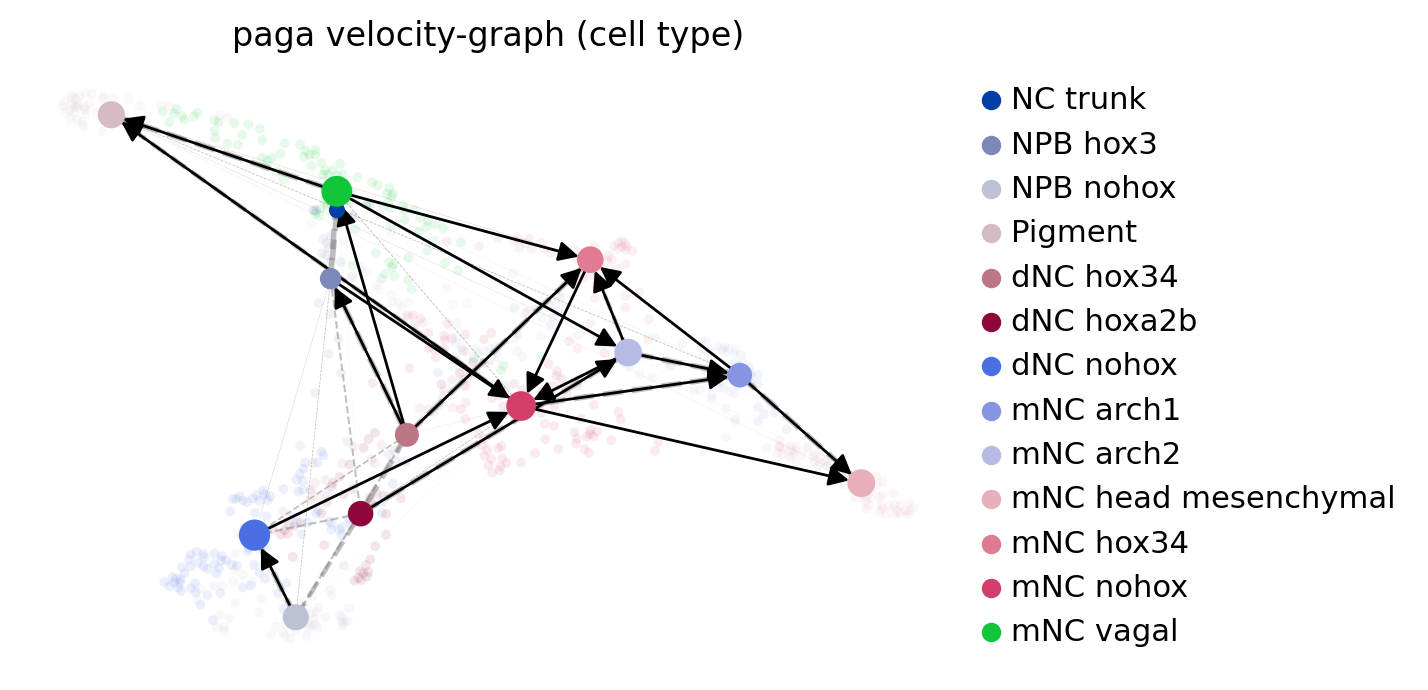

In [19]:
scv.pl.paga(adata, basis='draw_graph_fa', size=50, alpha=.1,threshold=0,
            min_edge_width=1, node_size_scale=0.5)

## Refine annotations

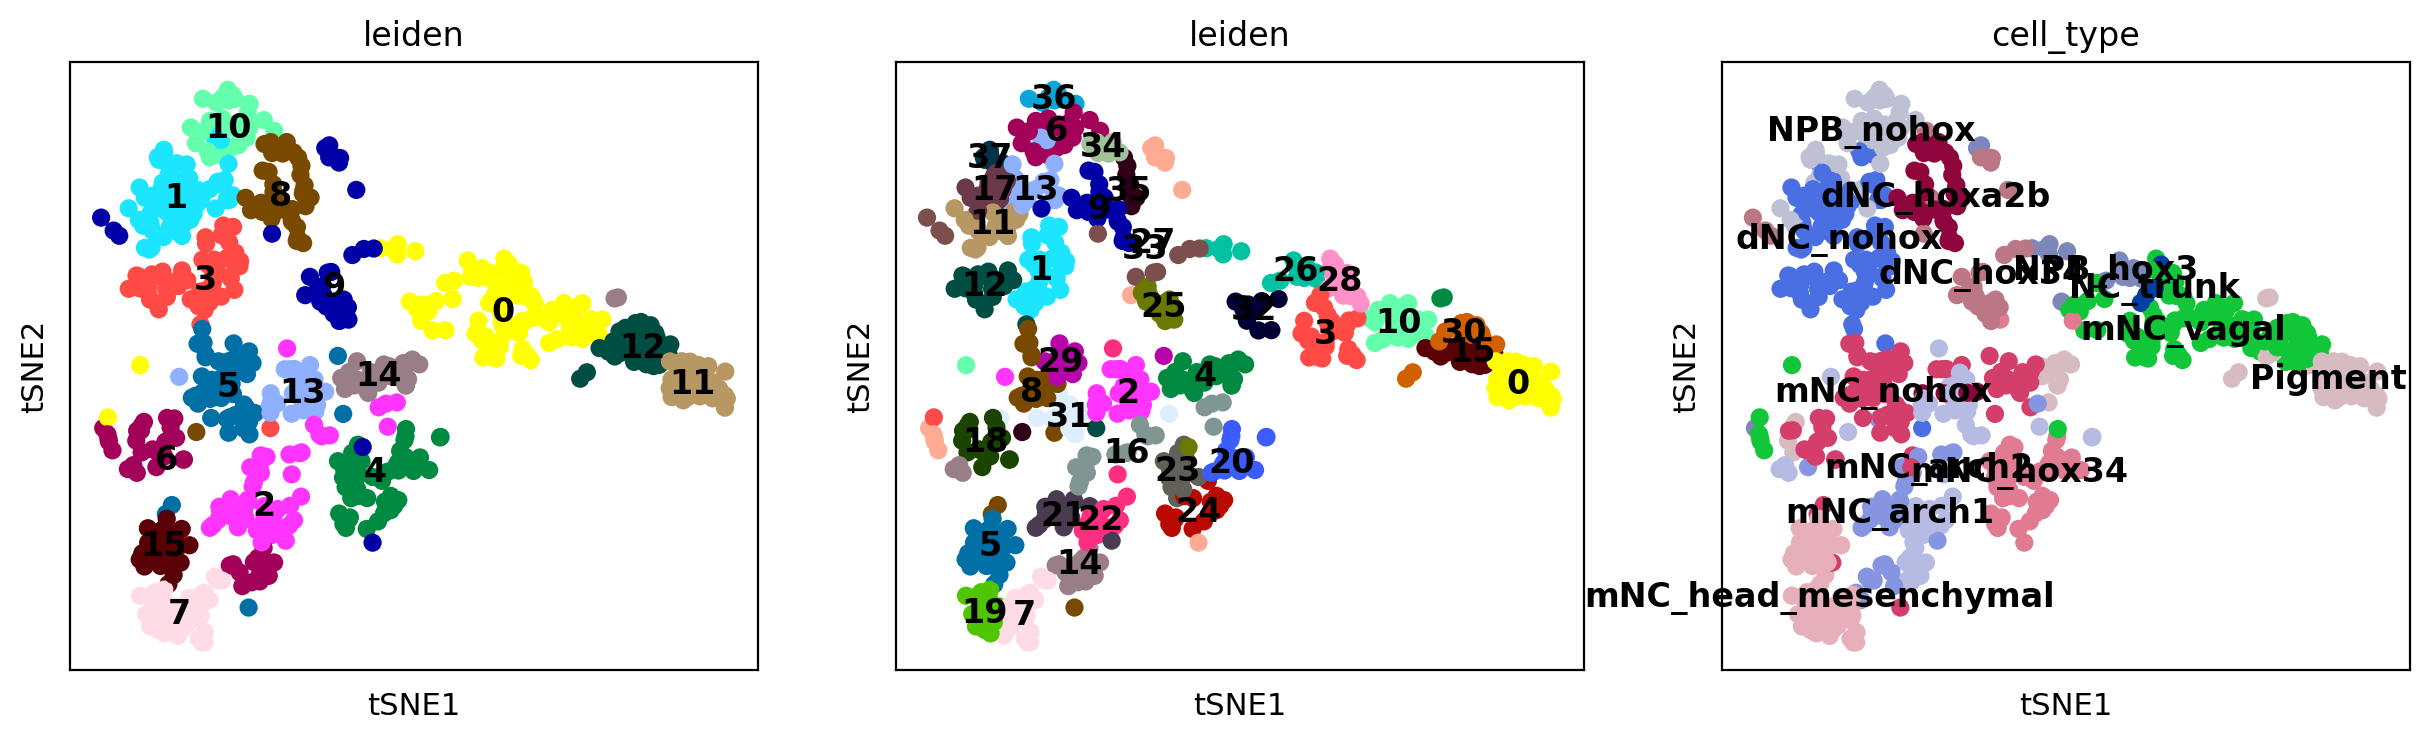

In [22]:
# Rename the division point as SMW.
import matplotlib.pyplot as plt
fig, ((ax1, ax2,ax3)) = plt.subplots(1, 3, figsize=(15,4))
sc.tl.leiden(adata, resolution=1)
ax1_dict = sc.pl.tsne(adata, color='leiden', legend_loc='on data', ax=ax1, show=False)
adata.obs['leiden_res1'] = adata.obs['leiden']
sc.tl.leiden(adata, resolution=5)
ax2_dict = sc.pl.tsne(adata, color='leiden', legend_loc='on data', ax=ax2, show=False)
ax3_dict = sc.pl.tsne(adata, color='cell_type', legend_loc='on data', ax=ax3, show=False)

<AxesSubplot:title={'center':'leiden_res1'}, xlabel='tSNE1', ylabel='tSNE2'>

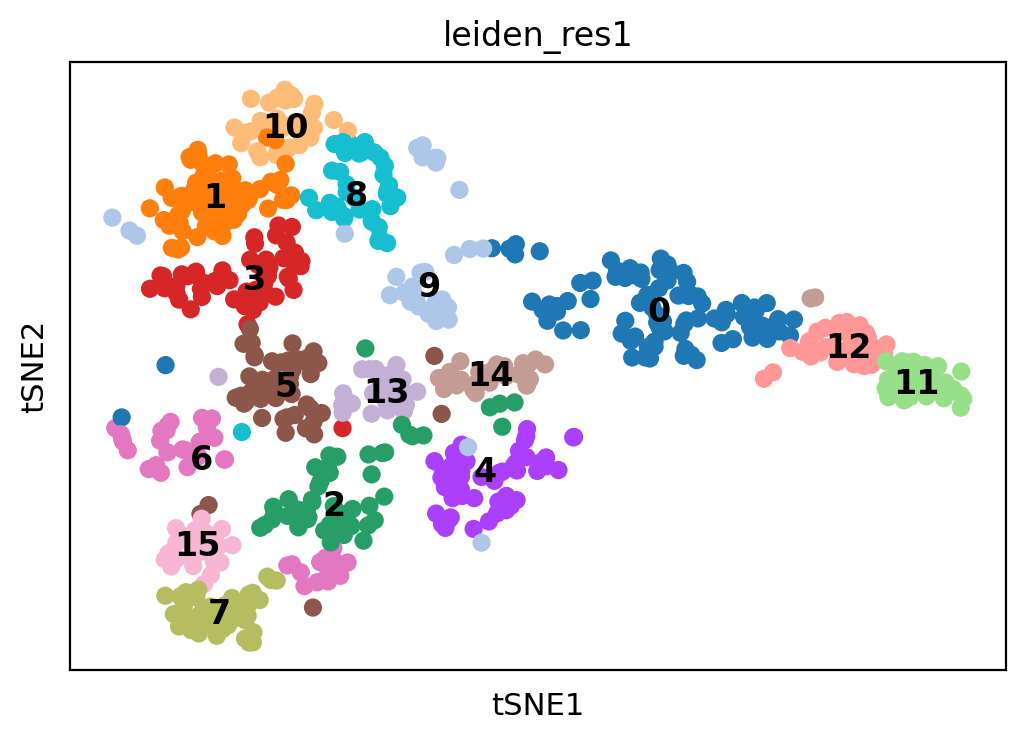

In [23]:
sc.pl.tsne(adata, color='leiden_res1', legend_loc='on data',show=False)

In [24]:
adata.obs['stage'] = adata.obs['stage'].astype("str")
adata.obs.loc[adata.obs['stage'] == '0','stage'] = 'epiboly-4ss'
adata.obs.loc[adata.obs['stage'] == '1','stage'] = '6-10ss'
adata.obs.loc[adata.obs['stage'] == '2','stage'] = '12-16ss'
adata.obs.loc[adata.obs['stage'] == '3','stage'] = '18-22ss'

<AxesSubplot:title={'center':'genotype'}, xlabel='tSNE1', ylabel='tSNE2'>

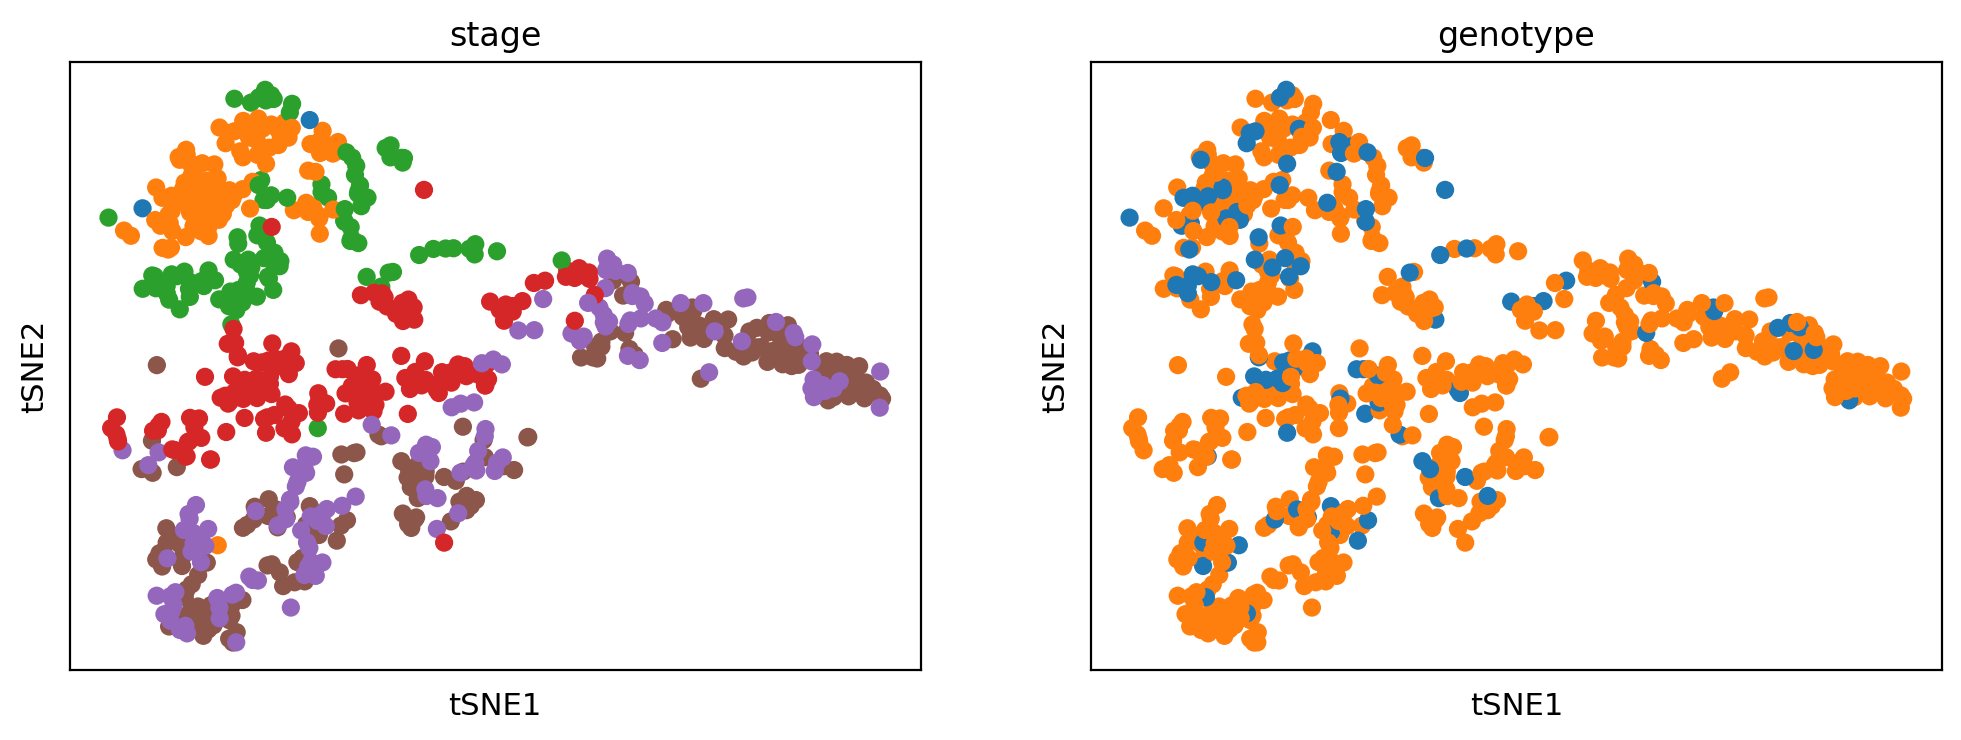

In [33]:
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(12,4))
sc.pl.tsne(adata, color='stage', legend_loc='right', ax=ax1, show=False)
sc.pl.tsne(adata, color='genotype', legend_loc='right', ax=ax2, show=False)

In [29]:
adata.obs['cell_type'].value_counts()

dNC_nohox               104
mNC_vagal                99
mNC_nohox                83
mNC_head_mesenchymal     62
mNC_arch2                61
Pigment                  56
mNC_hox34                51
NPB_nohox                47
dNC_hoxa2b               42
mNC_arch1                36
dNC_hox34                32
NPB_hox3                 19
NC_trunk                  5
Name: cell_type, dtype: int64

In [30]:
# Broader annotation
adata.obs['Diff_state'] = adata.obs['cell_type'].astype(str)
adata.obs.loc[adata.obs['cell_type'] == 'dNC_nohox_cycling','Diff_state'] = 'dNC_nohox'
adata.obs.loc[adata.obs['leiden'] == '26','Diff_state'] = 'pigment_new'
adata.obs.loc[adata.obs['leiden'] == '27','Diff_state'] = 'pigment_new'
adata.obs.loc[adata.obs['leiden_res1'] == '1','Diff_state'] = 'dNC_1'


running PAGA using priors: ['velocity_pseudotime']
    finished (0:00:00) --> added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns)
    'paga/transitions_confidence', velocity transitions (adata.uns)


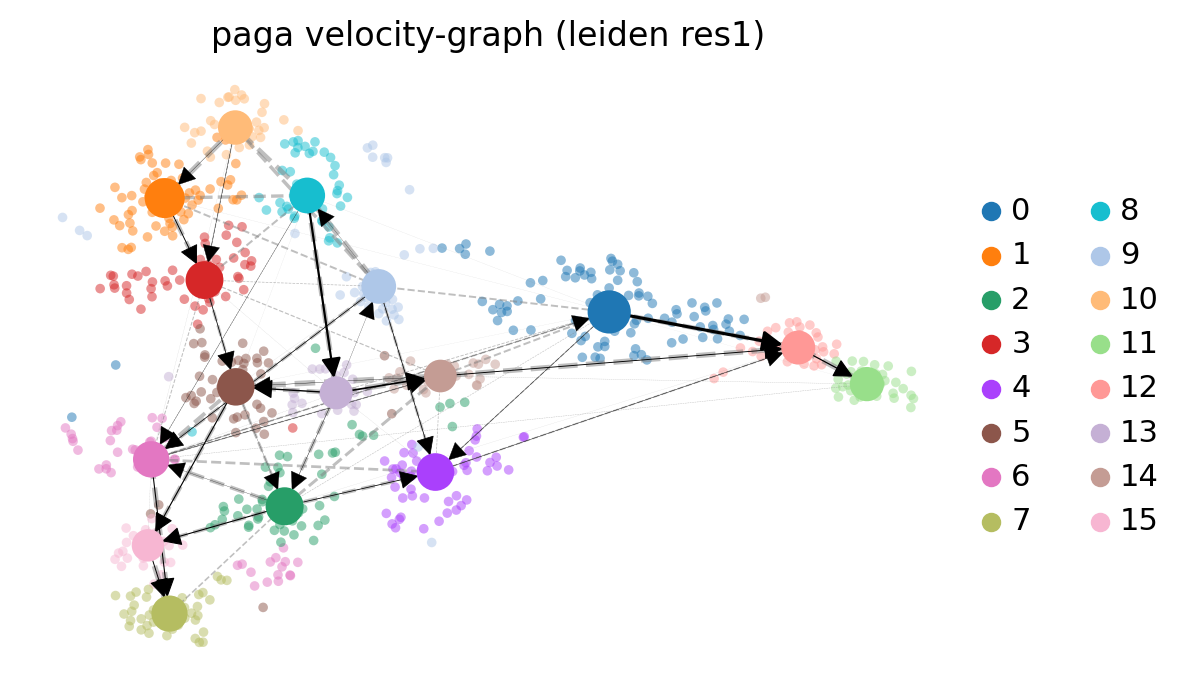

In [32]:
# PAGA graph
scv.tl.paga(adata, groups='leiden_res1',root_key=starting_idx,
            minimum_spanning_tree = False, threshold_root_end_prior = 0.5)
scv.pl.paga(adata, basis='tsne', threshold=0) #palette={}save='paga_plot.pdf'


In [25]:
adata.write_h5ad("data/scvelo_output/NCwtnohox_scVelo_out_uncorrected_highRes.h5ad")
#adata.obs.to_csv("../latent_time_grn/data/wtnohox/scvelo_highRes_obs.csv")